In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("data_plos_one_2015_anon.csv", sep=";")


In [37]:
df

,subject,IRM,group,lesion,agealirm,sex,handedness,lesion_side
0,sujet01_neg,1.5T,patients,negative,12,f,D,D
1,sujet08_neg,1.5T,patients,negative,11,m,D,D
2,sujet10_neg,1.5T,patients,negative,12,m,D,D
3,sujet12_neg,1.5T,patients,negative,17,f,D,D
4,sujet20_neg,1.5T,patients,negative,7,f,D,D
5,sujet22_neg,1.5T,patients,negative,42,f,D,D
6,sujet23_neg,1.5T,patients,negative,9,f,D,D
7,sujet02_pos,1.5T,patients,positive,19,m,D,D
8,sujet04_pos,1.5T,patients,positive,29,m,D,D
9,sujet05_pos,1.5T,patients,positive,32,f,G,D


In [38]:
error= pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/epilepsy_PBS/Reconstruction_error.csv")

In [39]:
error

,Unnamed: 0,0
0,control01,3217.521729
1,control02,3201.776367
2,control03,4088.432129
3,control04,2775.782715
4,control05,3493.113281
5,control06,3862.013672
6,control07,3310.393066
7,control08,3506.626709
8,control09,4038.550049
9,control10,2989.376465


In [40]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [41]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]
epilepsy_irm_neg= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_negatives_centrales"]
epilepsy_irm_pos= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="irm_positives_centrales"]

In [42]:
error  = error.rename(columns={error.columns[0]: "Index"})

In [43]:
df = df.rename(columns={df.columns[0]: "Index"})


In [44]:
error_controls = error.merge(epilepsy_controls[["Index"]], on="Index", how="inner")
error_irm_neg = error.merge(epilepsy_irm_neg[["Index"]], on="Index", how="inner")
error_irm_pos = error.merge(epilepsy_irm_pos[["Index"]], on="Index", how="inner")

In [53]:
error_controls

,Index,0
0,control01,3217.521729
1,control02,3201.776367
2,control03,4088.432129
3,control04,2775.782715
4,control05,3493.113281
5,control06,3862.013672
6,control07,3310.393066
7,control08,3506.626709
8,control09,4038.550049
9,control10,2989.376465


In [45]:
#df_controls= df.merge(error_controls, on ="Index", how="inner")
df_neg= df.merge(error_irm_neg, on ="Index", how="inner")
df_pos= df.merge(error_irm_pos, on ="Index", how="inner")

In [46]:
df_neg

,Index,IRM,group,lesion,agealirm,sex,handedness,lesion_side,0
0,sujet01_neg,1.5T,patients,negative,12,f,D,D,4203.624023
1,sujet08_neg,1.5T,patients,negative,11,m,D,D,4960.020508
2,sujet10_neg,1.5T,patients,negative,12,m,D,D,4753.197266
3,sujet12_neg,1.5T,patients,negative,17,f,D,D,4691.456055
4,sujet20_neg,1.5T,patients,negative,7,f,D,D,5346.845703
5,sujet22_neg,1.5T,patients,negative,42,f,D,D,3948.347900
6,sujet23_neg,1.5T,patients,negative,9,f,D,D,4748.267578
7,sujet03_neg,1.5T,patients,negative,24,f,G,G,3633.142578
8,sujet07_neg,1.5T,patients,negative,16,m,D,G,3983.527588
9,sujet13_neg,1.5T,patients,negative,7,f,D,G,5479.308594


In [60]:
df_pos

,Index,IRM,group,lesion,agealirm,sex,handedness,lesion_side,error
0,sujet02_pos,1.5T,patients,positive,19,m,D,D,5134.915527
1,sujet04_pos,1.5T,patients,positive,29,m,D,D,3499.770020
2,sujet05_pos,1.5T,patients,positive,32,f,G,D,3591.159180
3,sujet06_pos,1.5T,patients,positive,13,m,D,D,3993.062988
4,sujet07_pos,1.5T,patients,positive,36,m,G,D,3732.664062
5,sujet08_pos,1.5T,patients,positive,40,f,D,D,3093.048340
6,sujet10_pos,1.5T,patients,positive,11,f,D,D,5090.575684
7,sujet11_pos,1.5T,patients,positive,29,f,G,D,2830.882324
8,sujet13_pos,1.5T,patients,positive,43,f,G,D,4401.250000
9,sujet36_pos,3T,patients,positive,18,m,D,D,4801.316895


In [47]:
df_neg = df_neg.rename(columns={'0': 'error'})
df_pos = df_pos.rename(columns={'0': 'error'})
df_neg


,Index,IRM,group,lesion,agealirm,sex,handedness,lesion_side,error
0,sujet01_neg,1.5T,patients,negative,12,f,D,D,4203.624023
1,sujet08_neg,1.5T,patients,negative,11,m,D,D,4960.020508
2,sujet10_neg,1.5T,patients,negative,12,m,D,D,4753.197266
3,sujet12_neg,1.5T,patients,negative,17,f,D,D,4691.456055
4,sujet20_neg,1.5T,patients,negative,7,f,D,D,5346.845703
5,sujet22_neg,1.5T,patients,negative,42,f,D,D,3948.347900
6,sujet23_neg,1.5T,patients,negative,9,f,D,D,4748.267578
7,sujet03_neg,1.5T,patients,negative,24,f,G,G,3633.142578
8,sujet07_neg,1.5T,patients,negative,16,m,D,G,3983.527588
9,sujet13_neg,1.5T,patients,negative,7,f,D,G,5479.308594


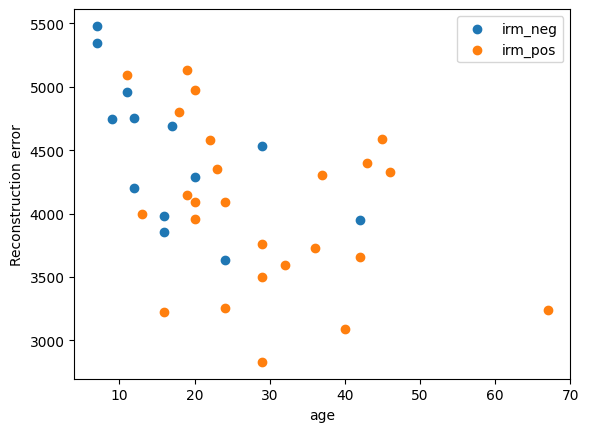

In [49]:

plt.scatter(df_neg['agealirm'], df_neg['error'], label="irm_neg")
plt.scatter(df_pos['agealirm'], df_pos['error'], label="irm_pos")

plt.xlabel("age")
plt.ylabel("Reconstruction error")
plt.legend()
plt.show()


In [52]:
df_neg_D = df_neg[df_neg['lesion_side']=='D']
df_neg_G = df_neg[df_neg['lesion_side']=='G']

df_pos_D = df_pos[df_pos['lesion_side']=='D']
df_pos_G = df_pos[df_pos['lesion_side']=='G']


In [59]:
print(df_neg_D['error'].mean())
print(df_neg_G['error'].mean())
print(df_pos_D['error'].mean())
print(df_pos_G['error'].mean())


4664.537004743303
4295.524576822917
3979.0791625976562
4074.960956280048


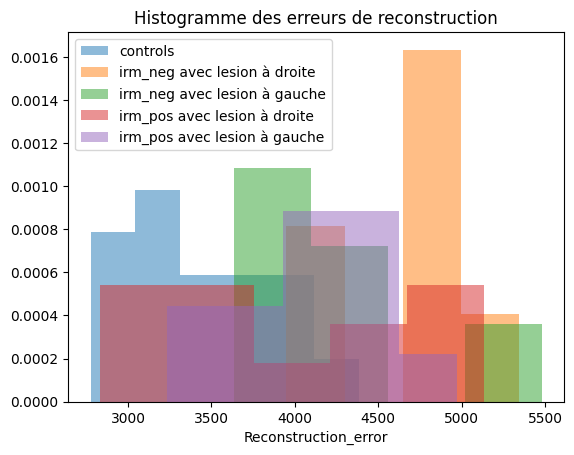

In [54]:
plt.hist(error_controls.iloc[:,1], bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(df_neg_D['error'], bins="auto", alpha=0.5, label="irm_neg avec lesion à droite", density=True)
plt.hist(df_neg_G['error'], bins="auto", alpha=0.5, label="irm_neg avec lesion à gauche", density=True)
plt.hist(df_pos_D['error'], bins="auto", alpha=0.5, label="irm_pos avec lesion à droite", density=True)
plt.hist(df_pos_G['error'], bins="auto", alpha=0.5, label="irm_pos avec lesion à gauche", density=True)

plt.xlabel("Reconstruction_error")

plt.title("Histogramme des erreurs de reconstruction")
plt.legend()
plt.show()

In [55]:
df_neg_m = df_neg[df_neg['sex']=='m']
df_neg_f = df_neg[df_neg['sex']=='f']

df_pos_m = df_pos[df_pos['sex']=='m']
df_pos_f = df_pos[df_pos['sex']=='f']

In [61]:
print(df_neg_m['error'].mean())
print(df_neg_f['error'].mean())
print(df_pos_m['error'].mean())
print(df_pos_f['error'].mean())

4496.656921386719
4493.14208984375
4120.126743861607
3912.87890625


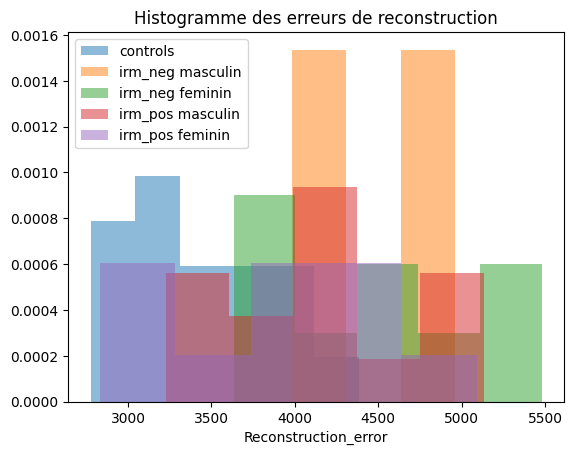

In [56]:
plt.hist(error_controls.iloc[:,1], bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(df_neg_m['error'], bins="auto", alpha=0.5, label="irm_neg masculin", density=True)
plt.hist(df_neg_f['error'], bins="auto", alpha=0.5, label="irm_neg feminin", density=True)
plt.hist(df_pos_m['error'], bins="auto", alpha=0.5, label="irm_pos masculin", density=True)
plt.hist(df_pos_f['error'], bins="auto", alpha=0.5, label="irm_pos feminin", density=True)

plt.xlabel("Reconstruction_error")

plt.title("Histogramme des erreurs de reconstruction")
plt.legend()
plt.show()